# Data Plots

In [62]:
import pandas as pd
import numpy as np

filename = 'GameSave.csv'

try:
    games = pd.read_csv(filename, index_col=0)
except FileNotFoundError:
    games = pd.DataFrame(columns=[
        "Game ID",
        "Player 1",
        "Player 2",
        "Player 1 Type",
        "Player 2 Type",
        "Winner",
])

games

,Game ID,Player 1,Player 2,Player 1 Type,Player 2 Type,Winner
0,1,Bot 1,Bot 2,Bot,Bot,Bot 1
1,2,Bot 1,Bot 2,Bot,Bot,Bot 1
2,3,Harry,Bot 2,Human,Bot,Harry
3,4,Harry,Jason,Human,Human,Harry
4,5,Jack,Jason,Human,Human,Jack
5,6,Jason,Jack,Human,Human,Jack
6,7,Jason,Bot 2,Human,Bot,Jason
7,8,Jack,Bot 2,Human,Bot,Bot 2
8,9,Bot 1,Bot 2,Bot,Bot,Bot 1
9,10,Jack,Harry,Human,Human,Harry


## Plot 1: Win Rate for Bots

From the graph, we can see that the winning rate for Bot 1 is significantly higher than Bot 2.

  Player  Win Rate
0  Bot 1  0.500000
1  Bot 2  0.272727


<AxesSubplot:>

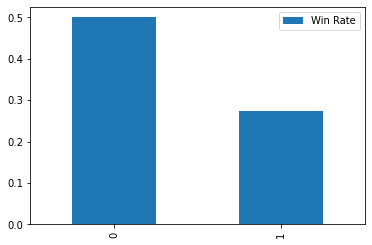

In [70]:
check_bot = games[['Player 1', 'Player 2', 'Winner']]
check_bot_1 = check_bot.loc[(check_bot['Player 1'] == 'Bot 1') | (check_bot['Player 2'] == 'Bot 1')]
check_bot_2 = check_bot.loc[(check_bot['Player 1'] == 'Bot 2') | (check_bot['Player 2'] == 'Bot 2')]

check_bot_1 = check_bot_1.replace('Bot 1', 1)
check_bot_1 = check_bot_1.replace('Bot 2', 2)
check_bot_2 = check_bot_2.replace('Bot 1', 1)
check_bot_2 = check_bot_2.replace('Bot 2', 2)

check_bot_1_winner = check_bot_1[check_bot_1['Winner'] == 1]
check_bot_2_winner = check_bot_2[check_bot_2['Winner'] == 2]

check_bot_1_winner_rate = len(check_bot_1_winner) / (len(check_bot_1) + len(check_bot_1_winner))
check_bot_2_winner_rate = len(check_bot_2_winner) / (len(check_bot_2) + len(check_bot_2_winner))

check_bot_rate = pd.DataFrame(columns=[
    'Player',
    'Win Rate',
])

check_bot_rate.loc[len(check_bot_rate)] = {
    'Player': 'Bot 1',
    'Win Rate': check_bot_1_winner_rate,
}

check_bot_rate.loc[len(check_bot_rate)] = {
    'Player': 'Bot 2',
    'Win Rate': check_bot_2_winner_rate,
}

print(check_bot_rate)

check_bot_rate.plot(kind='bar')

## Plot 2: Number of Wins and Draws
The graph shows the number of wins (game that has a winner) and number of draws.

  Result  Numbers
0    Win       13
1  Draws        1


<AxesSubplot:>

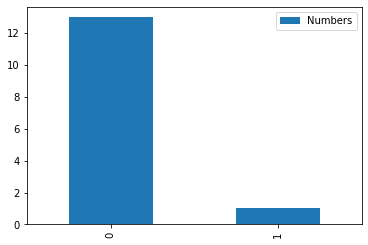

In [68]:
win_or_draw = pd.DataFrame(columns=[
    'Result',
    'Numbers',
])

number_wins = len(games[games['Winner'] != 'Draw'])
number_draws = len(games[games['Winner'] == 'Draw'])

win_or_draw.loc[len(win_or_draw)] = {
    'Result': 'Win',
    'Numbers': number_wins,
}

win_or_draw.loc[len(win_or_draw)] = {
    'Result': 'Draws',
    'Numbers': number_draws,
}

print(win_or_draw)

win_or_draw.plot(kind='bar')

## Plot 3: Win rate for Human against Bots
The graphs shows the win rate for each human against bots

  Player  Win Rate
0  Harry       1.0
1  Jason       0.5
2   Jack       0.0


<AxesSubplot:>

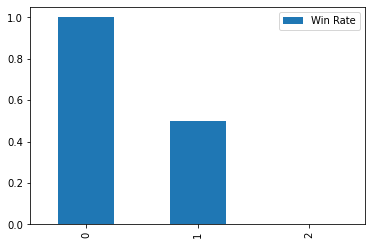

In [69]:
bot_games = games.loc[(games['Player 1'] != 'Bot 1') & (games['Player 2'] == 'Bot 2')]
unique_players = bot_games['Player 1'].unique()

win_rates = pd.DataFrame(columns=[
    'Player',
    'Win Rate',
])

for player in unique_players:
    player_games = bot_games[bot_games['Player 1'] == player]
    number_of_games = len(player_games)
    win_games = len(player_games[player_games['Winner'] == player])
    lose_games = len(player_games[player_games['Winner'] == 'Bot 2'])
    
    win_rate = win_games / max(1, (win_games + lose_games))
    
    win_rates.loc[len(win_rates)] = {
        'Player': player,
        'Win Rate': win_rate,
    }
    
print(win_rates)
    
win_rates.plot(kind='bar')